# **Twitter Sentiment Analysis for Stock Prediction**
#### **Selected stock : TSLA (Tesla Inc.)**



## **Importing packages**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## **Loading tweet data**

In [4]:
stock_tweets=pd.read_csv('TSLA_tweets.csv')
stock_tweets

,Unnamed: 0,Date,Tweet,Stock Name,Company Name
0,0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,1,2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."
...,...,...,...,...,...
37417,37417,2021-09-30,Playing in the dirt and #chasingsunsets\n@tesl...,TSLA,"Tesla, Inc."
37418,37418,2021-09-30,I agree with @freshjiva that $TSLA ‘s EV busin...,TSLA,"Tesla, Inc."
37419,37419,2021-09-30,Hold. On. Tight. $TSLA,TSLA,"Tesla, Inc."
37420,37420,2021-09-30,Get ready for a $TSLA _ _ _ _ _ _ Q3 delivery...,TSLA,"Tesla, Inc."


## **Using VADER sentiment analyser for sentiment analysis**

In [5]:
# Converting Tweets to string type
stock_tweets['Tweet'] = stock_tweets['Tweet'].astype(str)

model =  SentimentIntensityAnalyzer()
scores = stock_tweets['Tweet'].apply(model.polarity_scores)
scores

0        {'neg': 0.127, 'neu': 0.758, 'pos': 0.115, 'co...
1        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2        {'neg': 0.0, 'neu': 0.951, 'pos': 0.049, 'comp...
3        {'neg': 0.273, 'neu': 0.59, 'pos': 0.137, 'com...
4        {'neg': 0.526, 'neu': 0.474, 'pos': 0.0, 'comp...
                               ...                        
37417    {'neg': 0.197, 'neu': 0.656, 'pos': 0.148, 'co...
37418    {'neg': 0.078, 'neu': 0.747, 'pos': 0.175, 'co...
37419    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
37420    {'neg': 0.0, 'neu': 0.743, 'pos': 0.257, 'comp...
37421    {'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'comp...
Name: Tweet, Length: 37422, dtype: object

## **Merging compound VADER scores to dataset**

In [6]:
stock_tweets['Polarity_Score']=stock_tweets['Tweet'].apply(lambda score: model.polarity_scores(score)['compound'])
stock_tweets

,Unnamed: 0,Date,Tweet,Stock Name,Company Name,Polarity_Score
0,0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772
1,1,2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0000
2,2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.2960
3,3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568
4,4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.8750
...,...,...,...,...,...,...
37417,37417,2021-09-30,Playing in the dirt and #chasingsunsets\n@tesl...,TSLA,"Tesla, Inc.",-0.1531
37418,37418,2021-09-30,I agree with @freshjiva that $TSLA ‘s EV busin...,TSLA,"Tesla, Inc.",0.5719
37419,37419,2021-09-30,Hold. On. Tight. $TSLA,TSLA,"Tesla, Inc.",0.0000
37420,37420,2021-09-30,Get ready for a $TSLA _ _ _ _ _ _ Q3 delivery...,TSLA,"Tesla, Inc.",0.4215


## **Matching VADER scores with threshold value to determine Sentiment**

In [7]:
stock_tweets['Sentiment'] = 'None'
for index, row in stock_tweets.iterrows():
    if row['Polarity_Score'] >= 0.05:
        stock_tweets.at[index, 'Sentiment'] = 'Positive'
    elif row['Polarity_Score'] <= -0.05:
        stock_tweets.at[index, 'Sentiment'] = 'Negative'
    else:
        stock_tweets.at[index, 'Sentiment'] = 'Neutral'
stock_tweets

,Unnamed: 0,Date,Tweet,Stock Name,Company Name,Polarity_Score,Sentiment
0,0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,Positive
1,1,2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0000,Neutral
2,2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.2960,Positive
3,3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568,Negative
4,4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.8750,Negative
...,...,...,...,...,...,...,...
37417,37417,2021-09-30,Playing in the dirt and #chasingsunsets\n@tesl...,TSLA,"Tesla, Inc.",-0.1531,Negative
37418,37418,2021-09-30,I agree with @freshjiva that $TSLA ‘s EV busin...,TSLA,"Tesla, Inc.",0.5719,Positive
37419,37419,2021-09-30,Hold. On. Tight. $TSLA,TSLA,"Tesla, Inc.",0.0000,Neutral
37420,37420,2021-09-30,Get ready for a $TSLA _ _ _ _ _ _ Q3 delivery...,TSLA,"Tesla, Inc.",0.4215,Positive


## **Plotting Sentiment distribution**

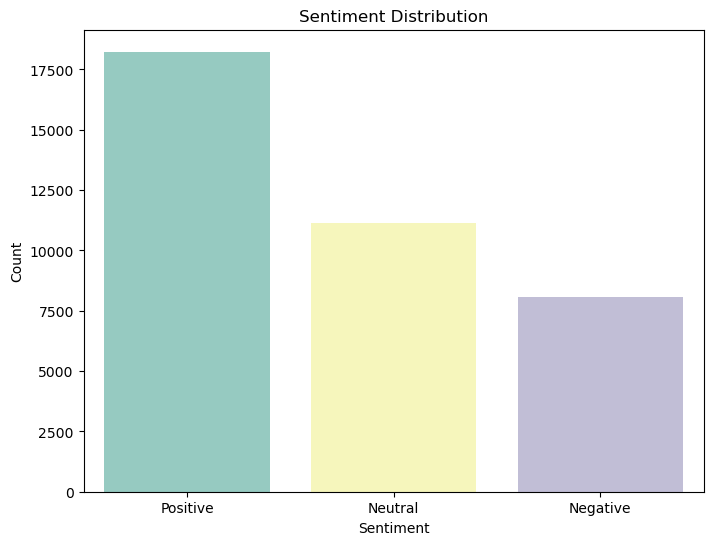

In [8]:
sentiment_counts = stock_tweets['Sentiment'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set3')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## **Getting number count of tweets for each date**

In [9]:
stock_tweets['Date']=pd.to_datetime(stock_tweets['Date']).dt.date
value=stock_tweets['Date'].value_counts();
value

Date
2021-10-25    462
2022-04-20    350
2022-01-26    314
2022-01-03    307
2022-07-20    269
             ... 
2022-09-25     36
2022-07-16     35
2022-03-05     35
2022-09-05     35
2022-02-26     33
Name: count, Length: 365, dtype: int64

## **Creating a new dataset showing number of tweets for each date**

In [10]:
sentiment_aggregate=pd.DataFrame({
    'Date': value.index,
    'Number of tweets': value.values
})
sentiment_aggregate

,Date,Number of tweets
0,2021-10-25,462
1,2022-04-20,350
2,2022-01-26,314
3,2022-01-03,307
4,2022-07-20,269
...,...,...
360,2022-09-25,36
361,2022-07-16,35
362,2022-03-05,35
363,2022-09-05,35


## **Getting aggregate Sentiment for each date**

In [11]:

sentiment_map = {'Negative': -1, 'Positive': 1, 'Neutral': 0}
stock_tweets['Sentiment_Value'] = stock_tweets['Sentiment'].map(sentiment_map)

# Grouping by 'Date' and calculate the overall sentiment
overall_sentiment = stock_tweets.groupby('Date')['Sentiment_Value'].sum()

# Converting the overall sentiment Series to object dtype (string)
overall_sentiment = overall_sentiment.astype(str)

# Applying rule to determine overall sentiment
overall_sentiment.loc[overall_sentiment > '0'] = 'Positive'
overall_sentiment.loc[overall_sentiment == '0'] = 'Neutral'
overall_sentiment.loc[overall_sentiment < '0'] = 'Negative'

overall_sentiment

Date
2021-09-30    Positive
2021-10-01    Positive
2021-10-02    Positive
2021-10-03    Positive
2021-10-04    Positive
                ...   
2022-09-25    Positive
2022-09-26    Positive
2022-09-27    Positive
2022-09-28    Positive
2022-09-29    Positive
Name: Sentiment_Value, Length: 365, dtype: object

## **Merging aggregate Sentiments to the aggregate dataset**

In [12]:
tweet_sentiment=pd.merge(sentiment_aggregate,overall_sentiment, on='Date', how='inner')
tweet_sentiment.rename(columns={'Sentiment_Value': 'Sentiment'}, inplace=True)
tweet_sentiment['Date'] = pd.to_datetime(tweet_sentiment['Date'])
tweet_sentiment

,Date,Number of tweets,Sentiment
0,2021-10-25,462,Positive
1,2022-04-20,350,Positive
2,2022-01-26,314,Positive
3,2022-01-03,307,Positive
4,2022-07-20,269,Positive
...,...,...,...
360,2022-09-25,36,Positive
361,2022-07-16,35,Positive
362,2022-03-05,35,Positive
363,2022-09-05,35,Positive


## **Loading Stock price dataset**

In [13]:
stock_prices=pd.read_csv("TSLA_prices.csv")
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'])
stock_prices

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA
...,...,...,...,...,...,...,...,...,...
247,247,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63748400,TSLA
248,248,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900,TSLA
249,249,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200,TSLA
250,250,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800,TSLA


## **Merging Stock price dataset to analysed date wise Sentiment dataset**

In [14]:
dataset=pd.merge(stock_prices,tweet_sentiment, on='Date', how='inner')
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name,Number of tweets,Sentiment
0,0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA,90,Positive
1,1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA,94,Positive
2,2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA,119,Positive
3,3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA,88,Positive
4,4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA,78,Positive
...,...,...,...,...,...,...,...,...,...,...,...
247,247,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63748400,TSLA,86,Positive
248,248,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900,TSLA,72,Positive
249,249,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200,TSLA,85,Positive
250,250,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800,TSLA,75,Positive


## **Spliting dataset into training and testing data**

In [27]:
# Features and target variable
X = dataset[[ 'Number of tweets','Sentiment']].copy()  # Create a copy of the DataFrame slice
y = dataset['Close']  # Target variable (stock price)

# Convert 'Sentiment' to numeric values
sentiment_map = {'Negative': -1, 'Positive': 1, 'Neutral': 0}
X['Sentiment'] = X['Sentiment'].map(sentiment_map)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:")
print(X_train.head())

print("\nX_test:")
print(X_test.head())

print("\ny_train:")
print(y_train.head())

print("\ny_test:")
print(y_test.head())


X_train:
     Number of tweets  Sentiment
136               179          1
55                113          1
204                84          1
216               209          1
147               103          1

X_test:
     Number of tweets  Sentiment
165                86          1
6                  90          1
111               102          1
172                79          1
115                82          1

y_train:
136    328.333344
55     310.856659
204    268.433319
216    294.356659
147    300.980011
Name: Close, dtype: float64

y_test:
165    235.910004
6      261.829987
111    279.433319
172    238.886673
115    280.076660
Name: Close, dtype: float64


## **Using Random Forest Regressor model to predict Stock prices**

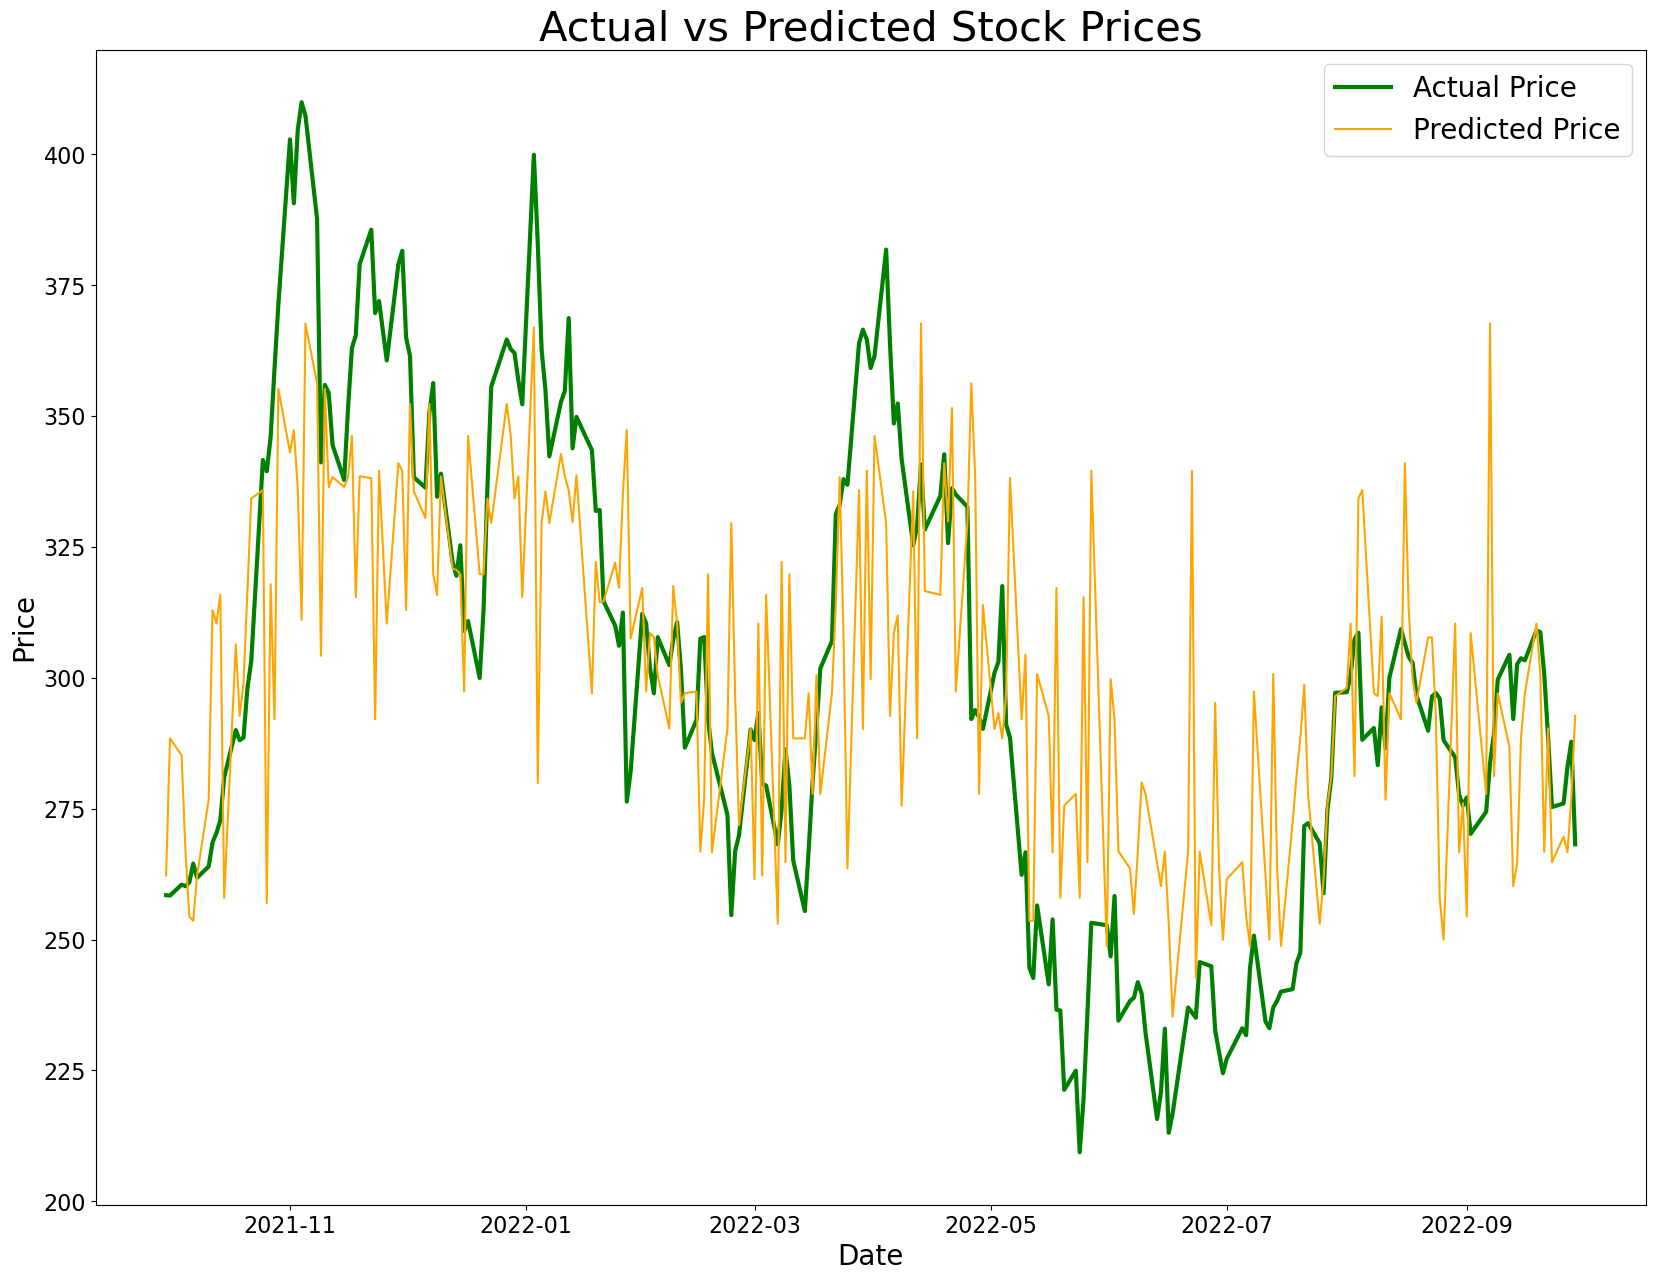

In [28]:
# Training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Visualizing actual vs predicted prices
plt.figure(figsize=(20, 15))  # Increase figure size
plt.plot(dataset['Date'], dataset['Close'], label='Actual Price', color='green', linewidth=3)  # Adjust linestyle and linewidth
plt.plot(dataset['Date'], rf_model.predict(X), label='Predicted Price', color='orange',linewidth=1.5)
plt.title('Actual vs Predicted Stock Prices', fontsize=30)  # Adjust title font size
plt.xlabel('Date', fontsize=20)  # Adjust x-axis label font size
plt.ylabel('Price', fontsize=20)  # Adjust y-axis label font size
plt.xticks(fontsize=16)  # Adjust x-axis tick label font size
plt.yticks(fontsize=16)  # Adjust y-axis tick label font size
plt.legend(fontsize=20)  # Adjust legend font size
plt.show()


## **Evaluating the model**

In [26]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R^2 Score: {train_r2}")
print(f"Test R^2 Score: {test_r2}")

Train RMSE: 28.896948053462857
Test RMSE: 47.99023091945681
Train R^2 Score: 0.5803953818130749
Test R^2 Score: 0.07359150241066881
